# Polynomial Regression

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [20]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### pre-process the data

In [21]:
# remove the Position column as it is not needed because of Level column
df.drop('Position', axis=1, inplace=True)

In [22]:
# split data into x and y
x = df.drop('Salary', axis=1)
y = df['Salary']

In [41]:
# add the polynomial terms of Level
from sklearn.preprocessing import PolynomialFeatures

# create an object to add polynomial features
poly = PolynomialFeatures(6)

# transform the Level values
x = poly.fit_transform(x)

In [32]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the model

In [33]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [34]:
y_pred = model.predict(x_test)
y_true = y_test

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
mae

20952.380944029643

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
mse

598554421.3274453

In [37]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

24465.371882059044

In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.9615215014860928

### result visualization

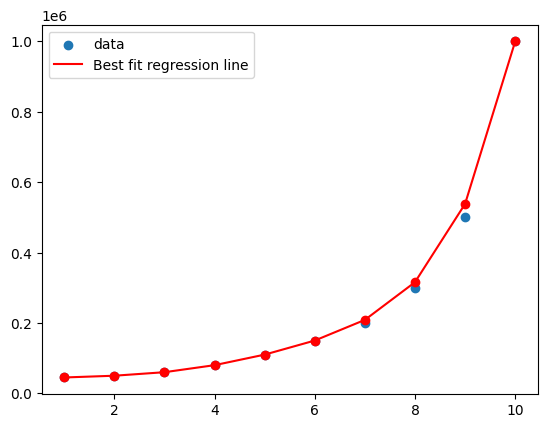

In [39]:
# data visualization
plt.scatter(df['Level'], y, label="data")

# regression line visualization
predictions = model.predict(x)
plt.scatter(df['Level'], predictions, color="red")
plt.plot(df['Level'], predictions, color="red", label="Best fit regression line")

plt.legend()